# Part 3 - Dimension Reduction

In [1]:
from ipywidgets import *
import matplotlib.pyplot as plt
plt.style.use('default')
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
#from yellowbrick.text.tsne import tsne
from yellowbrick.style import set_palette
set_palette('paired')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

/Users/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
poems = pd.read_csv("../corpora/german_poems.csv")
poems.sample(5)

,pid,filename,poet,title,year,poem,poemlength
45943,31355,"Logau, Friedrich von_83._1630","Logau, Friedrich von",83.,1630,"Das Ansehn wird geboren, erzogen und gespeist,...",41
39021,30136,"Verlaine, Paul-Marie_[Nicht können die Dome]_1870","Verlaine, Paul-Marie",[Nicht können die Dome],1870,Nicht können die Dome Dem Meer sich vergleiche...,104
58131,32700,"Logau, Friedrich von_27._1630","Logau, Friedrich von",27.,1630,"Stilpo, du geschwinder Kopff, balde weistu ein...",36
35366,19836,"Müller-Jahnke, Clara_Sommernachtszauber_1882","Müller-Jahnke, Clara",Sommernachtszauber,1882,Einsam in der Julinacht bin ich träumend heimg...,129
13634,26811,"Keller, Gottfried_8. Helene_1854","Keller, Gottfried",8. Helene,1854,"Tretet ein, hoher Krieger, Der sein Herz mir e...",133


In [ ]:
#todo: weg
#reshaping labels
#labels = labels.reshape(labels.shape[0])

In [3]:
labels = LabelEncoder().fit_transform(poems["poet"])
vectorizer = TfidfVectorizer(max_features=10000)
features  = vectorizer.fit_transform(poems["poem"])

## PCA

In [4]:
pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features.todense())

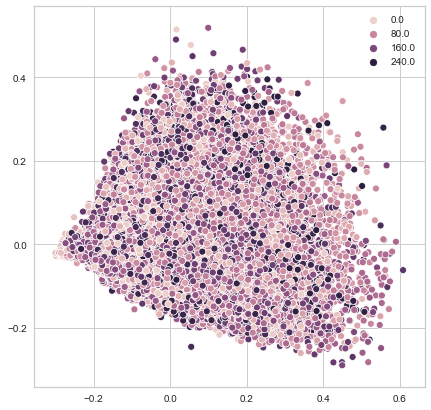

In [11]:
plt.figure(figsize=(7,7))
sns.scatterplot(features_reduced_pca[:, 0], 
                features_reduced_pca[:, 1], 
                hue=labels.astype(np.float),
                data=poems);
plt.savefig("img/pca_all_poems")
plt.show()

## TruncatedSVD / LSA (Sklearn)

<b>TruncatedSVD</b> ähnelt PCA, ist aber besser für Sparse Matrizen geeignet.

In [7]:
X_reduced = TruncatedSVD(n_components=40, random_state=0).fit_transform(features)

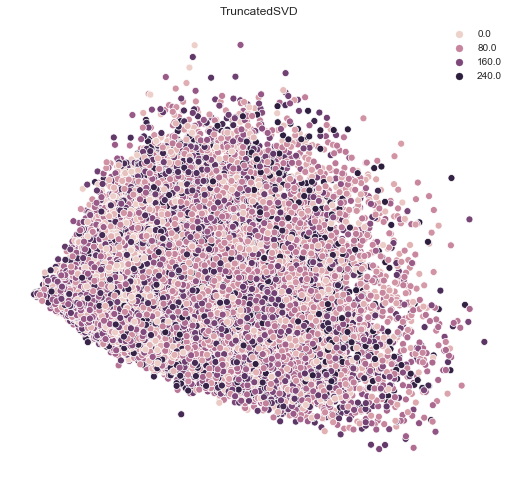

In [9]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels.astype(np.float), marker="o")
sns.scatterplot(X_reduced[:, 0], 
                X_reduced[:, 1], 
                hue=labels.astype(np.float),
                data=poems);
plt.title("TruncatedSVD")
plt.savefig("img/truncatedsvd_all_poems")
plt.show()

## T-SNE (Sklearn)

In [13]:
# Dimensionality Reduction: Truncated SVD
#X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(features)

# Dimensionality Reduction: T-SNE
X_embedded = TSNE(n_components=2, perplexity=40, verbose=0).fit_transform(X_reduced)

In [14]:
X_embedded.shape

(59081, 2)

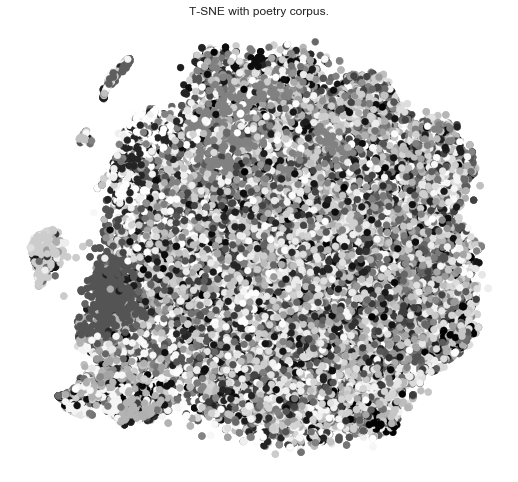

In [15]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels.astype(np.float), marker="o")
plt.title("T-SNE with poetry corpus.")
plt.savefig("img/tsne_all_poems")
plt.show()

## T-SNE (yellowbrick)

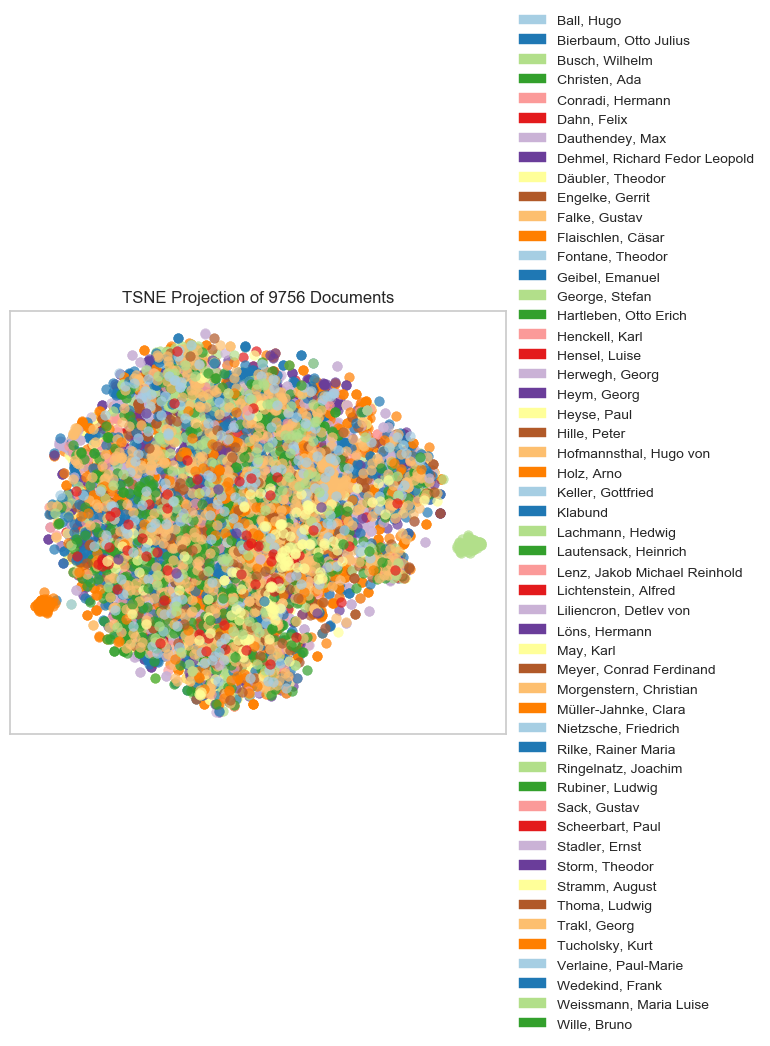

In [26]:
tsne = TSNEVisualizer(decompose_byint=100)
tsne.fit(features, poems["poet"])
plt.savefig("img/tsne_yellowrbick_all_poems")
tsne.show()

## UMAP (Yellowbrick)

/Users/jan/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


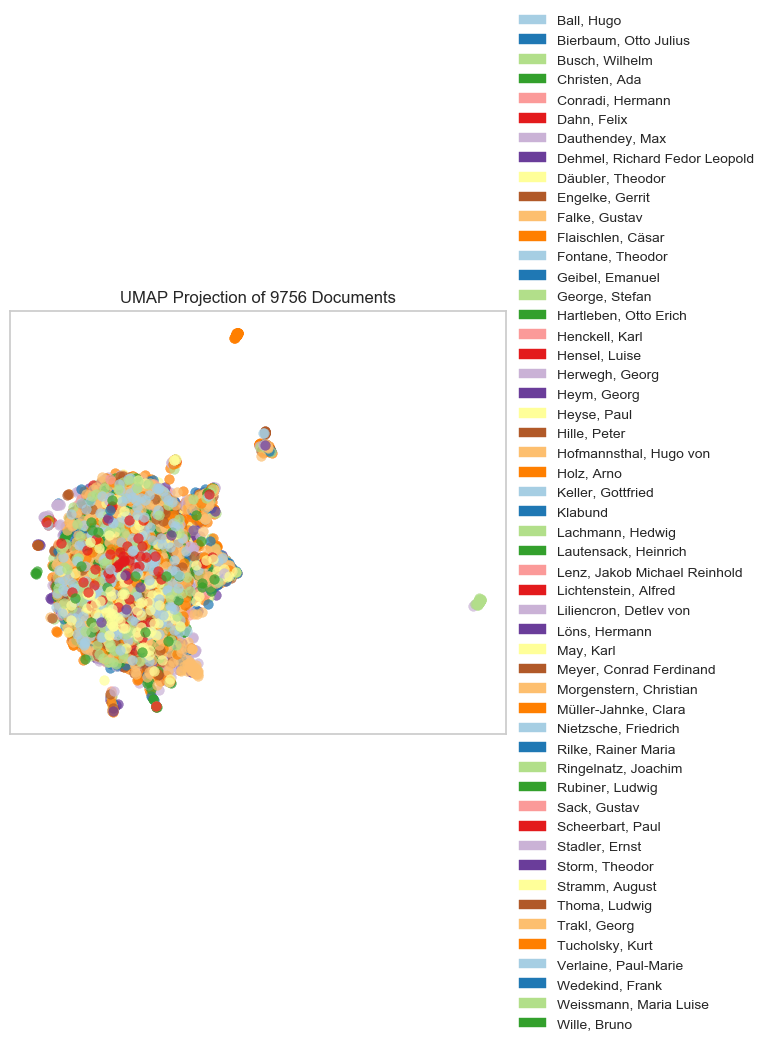

In [27]:
umap = UMAPVisualizer()
umap.fit(features, poems["poet"])
umap.show()

## T-SNE (verringerte Klassenanzahl & Yellowbrick)

In [28]:
dict(poems.poet.value_counts())

{'Tucholsky, Kurt': 668,
 'Dauthendey, Max': 648,
 'Holz, Arno': 514,
 'Morgenstern, Christian': 504,
 'Bierbaum, Otto Julius': 469,
 'Löns, Hermann': 438,
 'Henckell, Karl': 430,
 'Heyse, Paul': 405,
 'Busch, Wilhelm': 368,
 'Rilke, Rainer Maria': 362,
 'Klabund': 346,
 'Liliencron, Detlev von': 310,
 'Dehmel, Richard Fedor Leopold': 307,
 'Ringelnatz, Joachim': 300,
 'Christen, Ada': 257,
 'Müller-Jahnke, Clara': 225,
 'Thoma, Ludwig': 215,
 'Falke, Gustav': 188,
 'Meyer, Conrad Ferdinand': 186,
 'Hartleben, Otto Erich': 182,
 'Dahn, Felix': 182,
 'Hofmannsthal, Hugo von': 150,
 'May, Karl': 150,
 'Trakl, Georg': 150,
 'Flaischlen, Cäsar': 135,
 'Heym, Georg': 129,
 'Wedekind, Frank': 122,
 'Wille, Bruno': 122,
 'Stadler, Ernst': 120,
 'George, Stefan': 114,
 'Conradi, Hermann': 105,
 'Lichtenstein, Alfred': 101,
 'Weissmann, Maria Luise': 97,
 'Verlaine, Paul-Marie': 89,
 'Hille, Peter': 84,
 'Lachmann, Hedwig': 83,
 'Fontane, Theodor': 79,
 'Engelke, Gerrit': 66,
 'Sack, Gustav': 6

In [43]:
rpoems = poems.groupby("poet").filter(lambda x: len(x) < 100)
rfeatures  = TfidfVectorizer().fit_transform(rpoems["poem"])

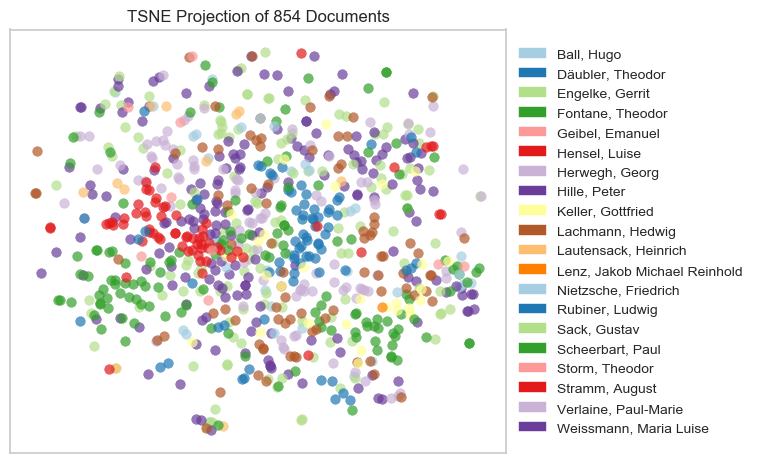

In [40]:
tsne = TSNEVisualizer(decompose_byint=100)
tsne.fit(rfeatures, rpoems["poet"])
tsne.show()

## KMeans

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [36]:


rpoems = pd.read_csv("../corpora/german_poems.csv")
#rpoems = rpoems[(rpoems.year >= 1650) & (rpoems.year <= 1750) ]
rpoems = rpoems[rpoems.year >= 1870]
#rpoems = rpoems.head(100)
rfeatures  = TfidfVectorizer().fit_transform(rpoems["poem"])

In [37]:
print(f"Anzahl der Gedichte: {len(rpoems.poem.unique())}")
print(f"Anzahl der Dichter: {len(rpoems.poet.unique())}")

Anzahl der Gedichte: 9756
Anzahl der Dichter: 52


In [41]:
dim_red = TruncatedSVD(n_components=2, random_state=0)
reduced_features = dim_red.fit_transform(rfeatures)
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
model = kmeans.fit_predict(reduced_features)
centroids = kmeans.cluster_centers_

In [42]:
reduced_features.shape

(9756, 2)

In [51]:
kmeans.score(centroids)

-0.0

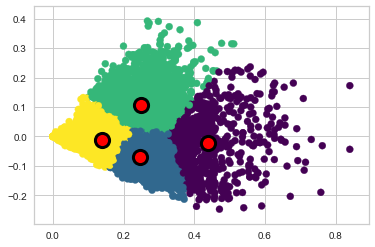

In [43]:
plt.scatter(reduced_features[:, 0], 
            reduced_features[:, 1], 
            c=model,
            #s=50, 
            cmap='viridis')
plt.scatter(centroids[:, 0], 
            centroids[:, 1], 
            c="red", 
            marker="o", 
            s=200, 
            lw=3,
            edgecolor="black")
plt.show()